# Data Exploring Notebook
The purpose of this notebook is the exploration of the CMMD Dataset (Chinese Mammography Database). With this exploration, we can then preprocess and split the data for training and experimentation.

The main objective is to classify the molecular subtypes of breast cancer using only mammographic images, and for that reason, the main focus will be in the "malignant" labeled cases.

# 0. Imports

In [2]:
%load_ext autoreload
%autoreload 2

In [20]:
import pandas as pd
import seaborn as sns
from config import RAW_DATA_DIR
import matplotlib.pyplot as plt

# 1. CMMD Dataset

## 1.1 Load data

In [5]:
clinical_data_df = pd.read_excel(f'{RAW_DATA_DIR}/CMMD/CMMD_clinicaldata_revision.xlsx')
metadata_df = pd.read_csv(f'{RAW_DATA_DIR}/CMMD/metadata.csv')

In [6]:
clinical_data_df.columns

Index(['ID1', 'LeftRight', 'Age', 'number', 'abnormality', 'classification',
       'subtype'],
      dtype='object')

In [7]:
metadata_df.head(5)

,Series UID,Collection,3rd Party Analysis,Data Description URI,Subject ID,Study UID,Study Description,Study Date,Series Description,Manufacturer,Modality,SOP Class Name,SOP Class UID,Number of Images,File Size,File Location,Download Timestamp
0,1.3.6.1.4.1.14519.5.2.1.1239.1759.623006463861...,CMMD,NO,https://doi.org/10.7937/tcia.eqde4b16,D1-0001,1.3.6.1.4.1.14519.5.2.1.1239.1759.335790956129...,NaN,07-18-2010,NaN,NaN,MG,Digital Mammography X-Ray Image Storage - For ...,1.2.840.10008.5.1.4.1.1.1.2,2,8.79 MB,.\CMMD\D1-0001\07-18-2010-NA-NA-79377\1.000000...,2022-04-06T19:50:58.958
1,1.3.6.1.4.1.14519.5.2.1.1239.1759.610823649257...,CMMD,NO,https://doi.org/10.7937/tcia.eqde4b16,D1-0002,1.3.6.1.4.1.14519.5.2.1.1239.1759.241519791051...,NaN,07-18-2010,NaN,NaN,MG,Digital Mammography X-Ray Image Storage - For ...,1.2.840.10008.5.1.4.1.1.1.2,2,8.79 MB,.\CMMD\D1-0002\07-18-2010-NA-NA-49231\1.000000...,2022-04-06T19:50:59.081
2,1.3.6.1.4.1.14519.5.2.1.1239.1759.292560899611...,CMMD,NO,https://doi.org/10.7937/tcia.eqde4b16,D1-0003,1.3.6.1.4.1.14519.5.2.1.1239.1759.113089024322...,NaN,07-18-2011,NaN,NaN,MG,Digital Mammography X-Ray Image Storage - For ...,1.2.840.10008.5.1.4.1.1.1.2,2,8.79 MB,.\CMMD\D1-0003\07-18-2011-NA-NA-25491\1.000000...,2022-04-06T19:50:59.25
3,1.3.6.1.4.1.14519.5.2.1.1239.1759.328825651506...,CMMD,NO,https://doi.org/10.7937/tcia.eqde4b16,D1-0004,1.3.6.1.4.1.14519.5.2.1.1239.1759.132173027545...,NaN,07-18-2011,NaN,NaN,MG,Digital Mammography X-Ray Image Storage - For ...,1.2.840.10008.5.1.4.1.1.1.2,2,8.79 MB,.\CMMD\D1-0004\07-18-2011-NA-NA-14914\1.000000...,2022-04-06T19:51:00.622
4,1.3.6.1.4.1.14519.5.2.1.1239.1759.148395128205...,CMMD,NO,https://doi.org/10.7937/tcia.eqde4b16,D1-0007,1.3.6.1.4.1.14519.5.2.1.1239.1759.225080655188...,NaN,07-18-2010,NaN,NaN,MG,Digital Mammography X-Ray Image Storage - For ...,1.2.840.10008.5.1.4.1.1.1.2,2,8.79 MB,.\CMMD\D1-0007\07-18-2010-NA-NA-58107\1.000000...,2022-04-06T19:51:02.192


In [8]:
clinical_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1872 entries, 0 to 1871
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   ID1             1872 non-null   object
 1   LeftRight       1872 non-null   object
 2   Age             1872 non-null   int64 
 3   number          1872 non-null   int64 
 4   abnormality     1872 non-null   object
 5   classification  1872 non-null   object
 6   subtype         749 non-null    object
dtypes: int64(2), object(5)
memory usage: 102.5+ KB


In [9]:
metadata_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1775 entries, 0 to 1774
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Series UID            1775 non-null   object 
 1   Collection            1775 non-null   object 
 2   3rd Party Analysis    1775 non-null   object 
 3   Data Description URI  1775 non-null   object 
 4   Subject ID            1775 non-null   object 
 5   Study UID             1775 non-null   object 
 6   Study Description     0 non-null      float64
 7   Study Date            1775 non-null   object 
 8   Series Description    0 non-null      float64
 9   Manufacturer          0 non-null      float64
 10  Modality              1775 non-null   object 
 11  SOP Class Name        1775 non-null   object 
 12  SOP Class UID         1775 non-null   object 
 13  Number of Images      1775 non-null   int64  
 14  File Size             1775 non-null   object 
 15  File Location        

## 1.2. Exploratory Data Analysis

### 1.2.1 Clinical Data Analysis
For the main objective we are going to filter only the rows with molecular subtype annotation.

In [10]:
len(clinical_data_df)

1872

In [11]:
clinical_data_df_filtered = clinical_data_df[clinical_data_df['subtype'].notnull()]
print(f'Original clinical data shape: {clinical_data_df.shape}')
print(f'Filtered clinical data shape: {clinical_data_df_filtered.shape}')

Original clinical data shape: (1872, 7)
Filtered clinical data shape: (749, 7)


There are 749 rows with molecular subtype annotation

In [12]:
clinical_data_df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Index: 749 entries, 1107 to 1871
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   ID1             749 non-null    object
 1   LeftRight       749 non-null    object
 2   Age             749 non-null    int64 
 3   number          749 non-null    int64 
 4   abnormality     749 non-null    object
 5   classification  749 non-null    object
 6   subtype         749 non-null    object
dtypes: int64(2), object(5)
memory usage: 46.8+ KB


In [13]:
clinical_data_df_filtered.head(5)
clinical_data_df_filtered.sort_values(by='Age')

,ID1,LeftRight,Age,number,abnormality,classification,subtype
1355,D2-0241,L,21,2,both,Malignant,Luminal B
1167,D2-0059,R,25,2,calcification,Malignant,Luminal A
1526,D2-0409,R,27,2,mass,Malignant,Luminal B
1543,D2-0426,R,27,2,mass,Malignant,Luminal B
1381,D2-0265,R,27,2,both,Malignant,Luminal B
...,...,...,...,...,...,...,...
1619,D2-0502,L,83,2,mass,Malignant,Luminal A
1535,D2-0418,L,83,2,mass,Malignant,Luminal B
1449,D2-0333,R,85,2,mass,Malignant,Luminal B
1773,D2-0654,L,85,2,mass,Malignant,triple negative


In [14]:
clinical_data_df_filtered['classification'].value_counts()

classification
Malignant    749
Name: count, dtype: int64

In [15]:
clinical_data_df_filtered.query('ID1 == "D2-0678"')

,ID1,LeftRight,Age,number,abnormality,classification,subtype
1798,D2-0678,L,74,2,mass,Malignant,Luminal B


### 1.2.2 ID1 (Patient ID)

In [16]:
clinical_data_df_filtered['ID1'].nunique()

749

In [17]:
clinical_data_df_filtered['ID1'].duplicated().sum()

np.int64(0)

### 1.2.3 LeftRight

In [18]:
clinical_data_df_filtered['LeftRight'].value_counts()

LeftRight
L    385
R    364
Name: count, dtype: int64

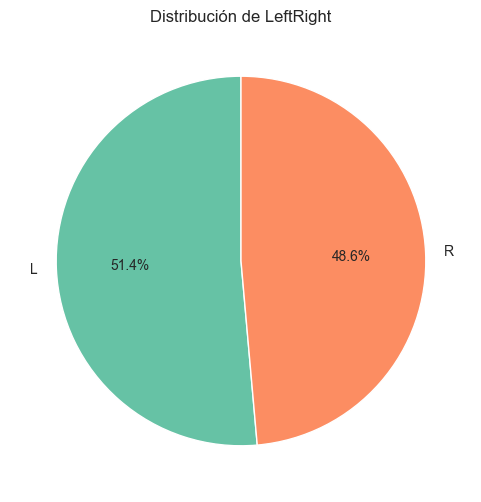

In [36]:
counts = clinical_data_df_filtered['LeftRight'].value_counts()

# Graficar el pie plot
plt.figure(figsize=(6,6))
plt.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=90, colors=['#66c2a5', '#fc8d62'])
plt.title('Distribución de LeftRight')
plt.show()

### 1.2.4 Age

In [24]:
clinical_data_df_filtered['Age'].describe()

count    749.000000
mean      49.818425
std       10.798179
min       21.000000
25%       43.000000
50%       49.000000
75%       57.000000
max       87.000000
Name: Age, dtype: float64

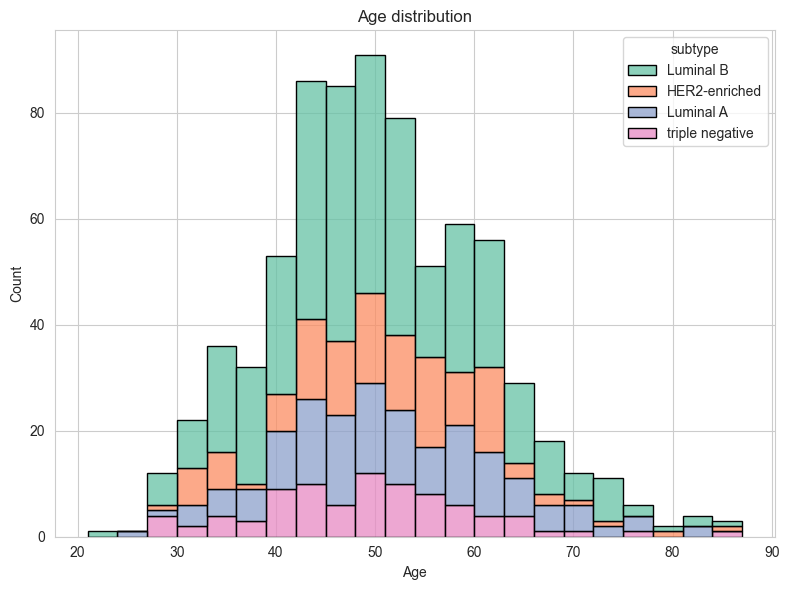

In [25]:
plt.figure(figsize=(8, 6))
sns.histplot(
    data=clinical_data_df_filtered,
    x='Age',
    hue='subtype',
    multiple='stack',
    palette='Set2',
    edgecolor='black'
)
plt.title('Age distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

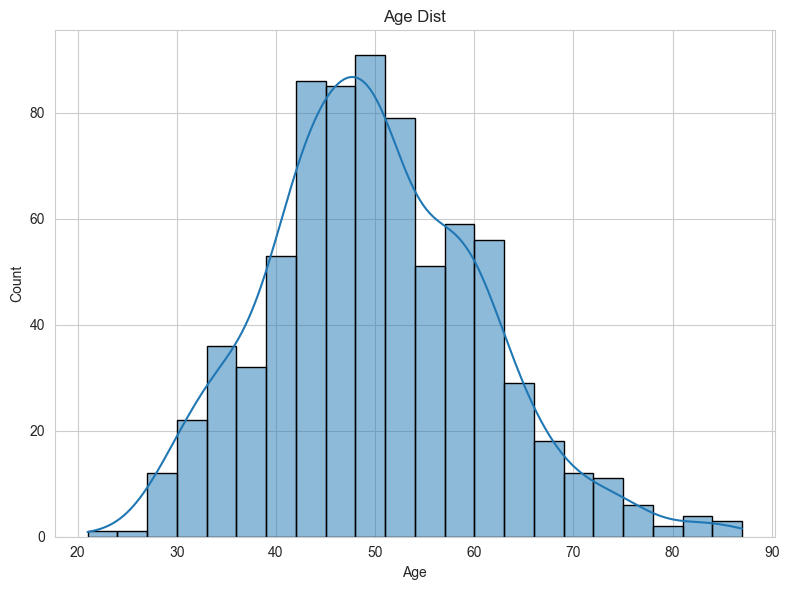

In [32]:
plt.figure(figsize=(8, 6))
sns.histplot(data=clinical_data_df_filtered, x='Age', kde=True, edgecolor='black')
plt.title('Age Dist')
plt.xlabel('Age')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

### 1.2.5 Abnormality

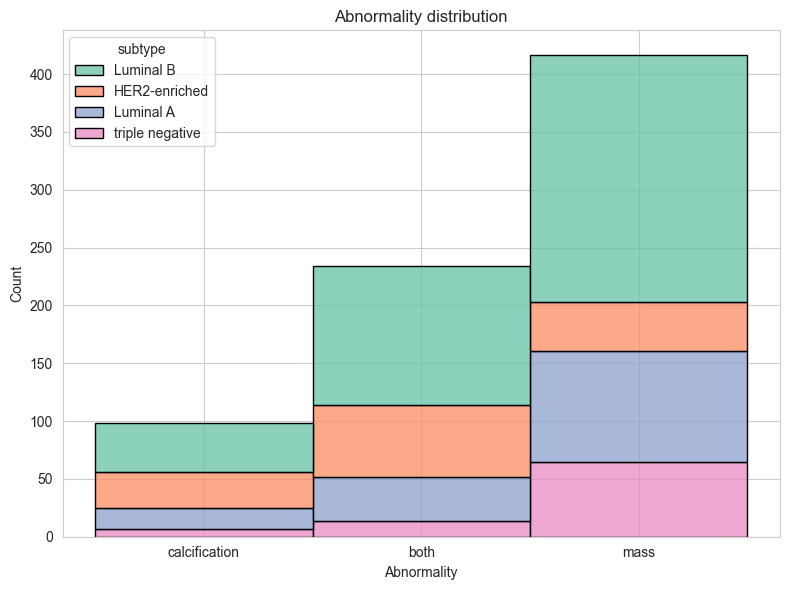

In [29]:
plt.figure(figsize=(8, 6))
sns.histplot(
    data=clinical_data_df_filtered,
    x='abnormality',
    hue='subtype',
    multiple='stack',
    palette='Set2',
    edgecolor='black'
)
plt.title('Abnormality distribution')
plt.xlabel('Abnormality')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

### 1.2.6 Subtype

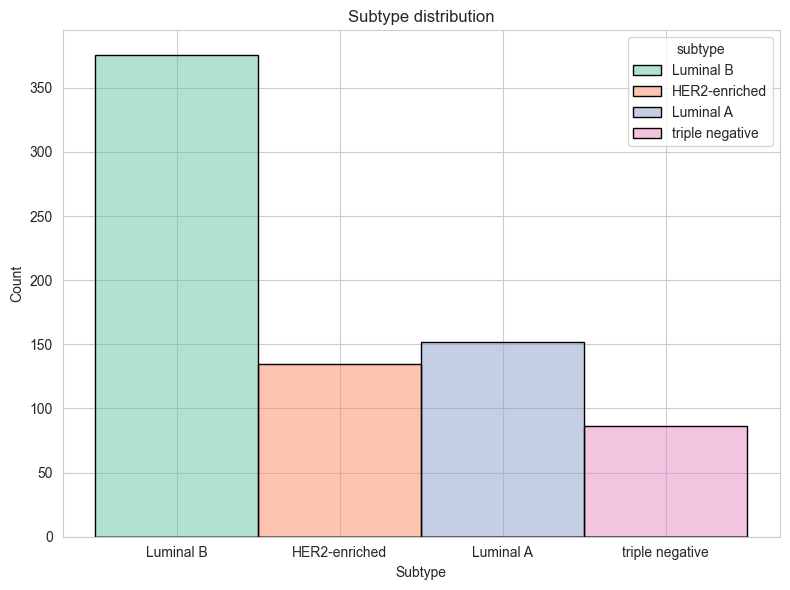

In [35]:
plt.figure(figsize=(8, 6))
sns.histplot(
    data=clinical_data_df_filtered,
    x='subtype',
    hue='subtype',
    palette='Set2',
    edgecolor='black'
)
plt.title('Subtype distribution')
plt.xlabel('Subtype')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

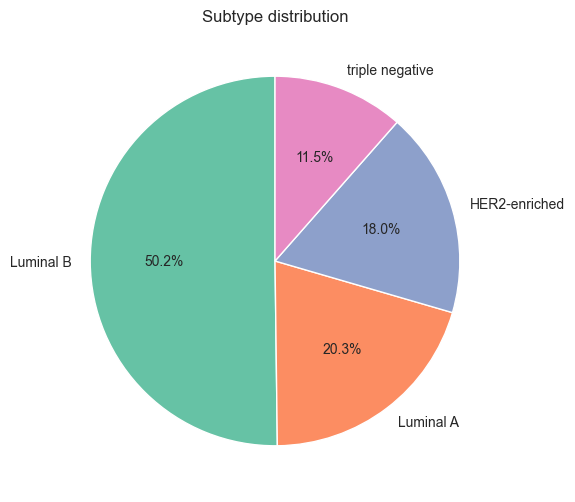

In [38]:
counts = clinical_data_df_filtered['subtype'].value_counts()
plt.figure(figsize=(6,6))
plt.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=90, colors=['#66c2a5', '#fc8d62', '#8da0cb', '#e78ac3'])
plt.title('Subtype distribution')
plt.show()

### 1.2.7 Resume

In [63]:
print(f'Number of records with subtype annotation: {len(clinical_data_df_filtered)}')
print(f'Number of unique patients with subtype annotation: {clinical_data_df_filtered["ID1"].nunique()}')
print(f'Molecular subtypes: {clinical_data_df_filtered["subtype"].unique()}')
print(f'Molecular subtypes distribution:\n{clinical_data_df_filtered["subtype"].value_counts()}')

Number of records with subtype annotation: 749
Number of unique patients with subtype annotation: 749
Molecular subtypes: ['Luminal B' 'HER2-enriched' 'Luminal A' 'triple negative']
Molecular subtypes distribution:
subtype
Luminal B          376
Luminal A          152
HER2-enriched      135
triple negative     86
Name: count, dtype: int64


## 1.3 Metadata review

In [39]:
metadata_df

,Series UID,Collection,3rd Party Analysis,Data Description URI,Subject ID,Study UID,Study Description,Study Date,Series Description,Manufacturer,Modality,SOP Class Name,SOP Class UID,Number of Images,File Size,File Location,Download Timestamp
0,1.3.6.1.4.1.14519.5.2.1.1239.1759.623006463861...,CMMD,NO,https://doi.org/10.7937/tcia.eqde4b16,D1-0001,1.3.6.1.4.1.14519.5.2.1.1239.1759.335790956129...,NaN,07-18-2010,NaN,NaN,MG,Digital Mammography X-Ray Image Storage - For ...,1.2.840.10008.5.1.4.1.1.1.2,2,8.79 MB,.\CMMD\D1-0001\07-18-2010-NA-NA-79377\1.000000...,2022-04-06T19:50:58.958
1,1.3.6.1.4.1.14519.5.2.1.1239.1759.610823649257...,CMMD,NO,https://doi.org/10.7937/tcia.eqde4b16,D1-0002,1.3.6.1.4.1.14519.5.2.1.1239.1759.241519791051...,NaN,07-18-2010,NaN,NaN,MG,Digital Mammography X-Ray Image Storage - For ...,1.2.840.10008.5.1.4.1.1.1.2,2,8.79 MB,.\CMMD\D1-0002\07-18-2010-NA-NA-49231\1.000000...,2022-04-06T19:50:59.081
2,1.3.6.1.4.1.14519.5.2.1.1239.1759.292560899611...,CMMD,NO,https://doi.org/10.7937/tcia.eqde4b16,D1-0003,1.3.6.1.4.1.14519.5.2.1.1239.1759.113089024322...,NaN,07-18-2011,NaN,NaN,MG,Digital Mammography X-Ray Image Storage - For ...,1.2.840.10008.5.1.4.1.1.1.2,2,8.79 MB,.\CMMD\D1-0003\07-18-2011-NA-NA-25491\1.000000...,2022-04-06T19:50:59.25
3,1.3.6.1.4.1.14519.5.2.1.1239.1759.328825651506...,CMMD,NO,https://doi.org/10.7937/tcia.eqde4b16,D1-0004,1.3.6.1.4.1.14519.5.2.1.1239.1759.132173027545...,NaN,07-18-2011,NaN,NaN,MG,Digital Mammography X-Ray Image Storage - For ...,1.2.840.10008.5.1.4.1.1.1.2,2,8.79 MB,.\CMMD\D1-0004\07-18-2011-NA-NA-14914\1.000000...,2022-04-06T19:51:00.622
4,1.3.6.1.4.1.14519.5.2.1.1239.1759.148395128205...,CMMD,NO,https://doi.org/10.7937/tcia.eqde4b16,D1-0007,1.3.6.1.4.1.14519.5.2.1.1239.1759.225080655188...,NaN,07-18-2010,NaN,NaN,MG,Digital Mammography X-Ray Image Storage - For ...,1.2.840.10008.5.1.4.1.1.1.2,2,8.79 MB,.\CMMD\D1-0007\07-18-2010-NA-NA-58107\1.000000...,2022-04-06T19:51:02.192
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1770,1.3.6.1.4.1.14519.5.2.1.1239.1759.254393425808...,CMMD,NO,https://doi.org/10.7937/tcia.eqde4b16,D2-0745,1.3.6.1.4.1.14519.5.2.1.1239.1759.829075352788...,NaN,07-18-2011,NaN,NaN,MG,Digital Mammography X-Ray Image Storage - For ...,1.2.840.10008.5.1.4.1.1.1.2,4,17.57 MB,.\CMMD\D2-0745\07-18-2011-NA-NA-87264\1.000000...,2022-04-06T20:14:09.525
1771,1.3.6.1.4.1.14519.5.2.1.1239.1759.240741173543...,CMMD,NO,https://doi.org/10.7937/tcia.eqde4b16,D2-0747,1.3.6.1.4.1.14519.5.2.1.1239.1759.240317944400...,NaN,07-18-2011,NaN,NaN,MG,Digital Mammography X-Ray Image Storage - For ...,1.2.840.10008.5.1.4.1.1.1.2,4,17.57 MB,.\CMMD\D2-0747\07-18-2011-NA-NA-07955\1.000000...,2022-04-06T20:14:10.074
1772,1.3.6.1.4.1.14519.5.2.1.1239.1759.972296336858...,CMMD,NO,https://doi.org/10.7937/tcia.eqde4b16,D2-0746,1.3.6.1.4.1.14519.5.2.1.1239.1759.291758813596...,NaN,07-18-2011,NaN,NaN,MG,Digital Mammography X-Ray Image Storage - For ...,1.2.840.10008.5.1.4.1.1.1.2,4,17.57 MB,.\CMMD\D2-0746\07-18-2011-NA-NA-61307\1.000000...,2022-04-06T20:14:10.517
1773,1.3.6.1.4.1.14519.5.2.1.1239.1759.242283723072...,CMMD,NO,https://doi.org/10.7937/tcia.eqde4b16,D2-0748,1.3.6.1.4.1.14519.5.2.1.1239.1759.194867387180...,NaN,07-18-2011,NaN,NaN,MG,Digital Mammography X-Ray Image Storage - For ...,1.2.840.10008.5.1.4.1.1.1.2,4,17.57 MB,.\CMMD\D2-0748\07-18-2011-NA-NA-50416\1.000000...,2022-04-06T20:14:12.582


In [54]:
metadata_filtered = metadata_df[metadata_df['Subject ID'].isin(clinical_data_df_filtered['ID1'])]

# Number of images
metadata_filtered['Number of Images'].value_counts()

Number of Images
4    745
2      4
Name: count, dtype: int64

# 2. TOMPEI-CMMD Revision

Here we are introducing reviewed data from the TOMPEI-CMMD revision, which includes additional annotations, exclusions and corrections to the original CMMD dataset. This revision aims to enhance the quality and reliability of the data for breast cancer research.

More info [here](https://www.cancerimagingarchive.net/analysis-result/tompei-cmmd/)

In [44]:
tompei_cmmd = pd.read_csv(f'{RAW_DATA_DIR}/CMMD/tompei-cmmd.csv', delimiter=';')

In [45]:
tompei_cmmd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 674 entries, 0 to 673
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ID         674 non-null    object
 1   LeftRight  674 non-null    object
 2   Age        674 non-null    int64 
dtypes: int64(1), object(2)
memory usage: 15.9+ KB


In [46]:
merged_clinical_data = clinical_data_df_filtered.merge(tompei_cmmd, left_on='ID1', right_on='ID')

In [48]:
merged_clinical_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 674 entries, 0 to 673
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   ID1             674 non-null    object
 1   LeftRight_x     674 non-null    object
 2   Age_x           674 non-null    int64 
 3   number          674 non-null    int64 
 4   abnormality     674 non-null    object
 5   classification  674 non-null    object
 6   subtype         674 non-null    object
 7   ID              674 non-null    object
 8   LeftRight_y     674 non-null    object
 9   Age_y           674 non-null    int64 
dtypes: int64(3), object(7)
memory usage: 52.8+ KB


In [49]:
merged_clinical_data.query('LeftRight_x != LeftRight_y')

,ID1,LeftRight_x,Age_x,number,abnormality,classification,subtype,ID,LeftRight_y,Age_y
43,D2-0048,L,54,2,calcification,Malignant,HER2-enriched,D2-0048,R,54
121,D2-0132,R,49,2,both,Malignant,Luminal A,D2-0132,L,49
196,D2-0212,R,54,2,both,Malignant,Luminal A,D2-0212,L,54
204,D2-0220,R,49,2,both,Malignant,Luminal B,D2-0220,L,49
261,D2-0282,R,30,2,both,Malignant,Luminal B,D2-0282,L,30
419,D2-0458,R,57,2,mass,Malignant,Luminal A,D2-0458,L,57
509,D2-0565,R,75,2,mass,Malignant,Luminal A,D2-0565,L,75
575,D2-0637,L,36,2,mass,Malignant,Luminal A,D2-0637,R,36
635,D2-0706,R,44,2,mass,Malignant,Luminal B,D2-0706,L,44


In [66]:
curated_df = merged_clinical_data[['ID', 'LeftRight_y', 'Age_y', 'abnormality', 'classification', 'subtype']]

In [67]:
curated_df = curated_df.rename(columns={'ID':'patientId', 'Age_y': 'age', 'LeftRight_y': 'malignantSide'})
curated_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 674 entries, 0 to 673
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   patientId       674 non-null    object
 1   malignantSide   674 non-null    object
 2   age             674 non-null    int64 
 3   abnormality     674 non-null    object
 4   classification  674 non-null    object
 5   subtype         674 non-null    object
dtypes: int64(1), object(5)
memory usage: 31.7+ KB


## 2.1 MalignantSide

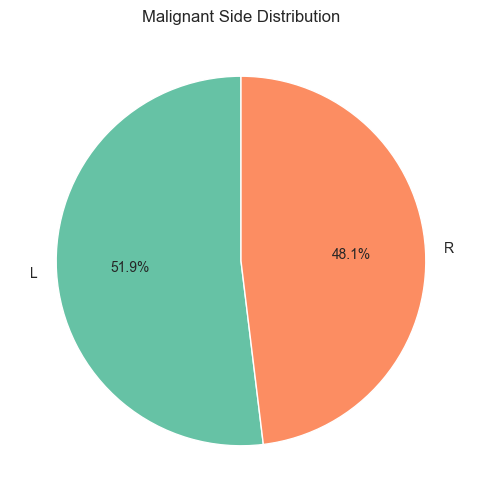

In [68]:
counts = curated_df['malignantSide'].value_counts()

# Graficar el pie plot
plt.figure(figsize=(6,6))
plt.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=90, colors=['#66c2a5', '#fc8d62'])
plt.title('Malignant Side Distribution')
plt.show()

## 2.2 Subtypes

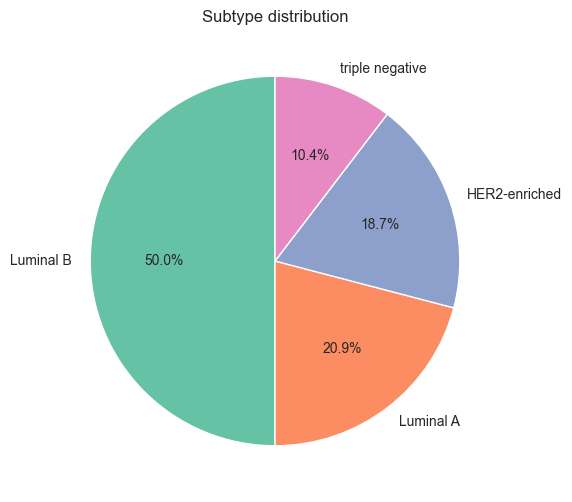

In [69]:
counts = curated_df['subtype'].value_counts()
plt.figure(figsize=(6,6))
plt.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=90, colors=['#66c2a5', '#fc8d62', '#8da0cb', '#e78ac3'])
plt.title('Subtype distribution')
plt.show()

## 2.3 Resume

In [70]:
print(f'Number of records with subtype annotation: {len(curated_df)}')
print(f'Number of unique patients with subtype annotation: {curated_df["patientId"].nunique()}')
print(f'Molecular subtypes: {curated_df["subtype"].unique()}')
print(f'Molecular subtypes distribution:\n{curated_df["subtype"].value_counts()}')

Number of records with subtype annotation: 674
Number of unique patients with subtype annotation: 672
Molecular subtypes: ['Luminal B' 'HER2-enriched' 'Luminal A' 'triple negative']
Molecular subtypes distribution:
subtype
Luminal B          337
Luminal A          141
HER2-enriched      126
triple negative     70
Name: count, dtype: int64


# 3. Persist final dataframe

In [71]:
curated_df.to_csv(f'{RAW_DATA_DIR}/CMMD/curated_df.csv', index=False)